In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colorG = 'tab:blue'
colorL = 'tab:green'
%load_ext autoreload
%autoreload 2

In [37]:
df = pd.read_csv('/SBML/PyPESTO/COMP/LyndPLGConversionData.csv')

# All columns that contain an X should be divided by 100
for col in df.columns:
    if 'X' in col:
        df[col] = df[col]/100

# df['X'] = df['X']/100
df.head()

,T10G,X10G,T10L,X10L,T15G,X15G,T15L,X15L,T20G,X20G,T20L,X20L,T25G,X25G,T25L,X25L,T40G,X40G,T40L,X40L
0,-0.31250,0.004,-0.31250,-0.004,0.000000,0.000,0.000000,0.000,0.15625,0.000,-0.390606,-0.000667,0.307692,0.004,-0.153846,-0.004,0.307692,0.001980,0.307692,-0.003300
1,0.15625,0.228,0.15625,0.048,0.465116,0.248,0.465116,0.076,0.15625,0.264,0.546894,0.083333,0.769231,0.268,0.769231,0.084,1.230769,0.457426,1.230769,0.163036
2,0.15625,0.444,0.15625,0.160,0.930233,0.380,0.930233,0.128,1.09375,0.476,1.015644,0.167333,1.230769,0.416,0.769231,0.136,2.153846,0.706931,2.153846,0.309571
3,1.56250,0.536,1.56250,0.184,1.395349,0.520,1.395349,0.200,1.56250,0.588,1.015644,0.211333,1.692308,0.588,1.692308,0.232,3.538462,0.817822,3.076923,0.388779
4,2.03125,0.672,2.03125,0.276,2.325581,0.656,1.860465,0.268,2.03125,0.708,2.421894,0.291333,2.615385,0.720,1.692308,0.284,5.384615,0.928713,5.384615,0.527393


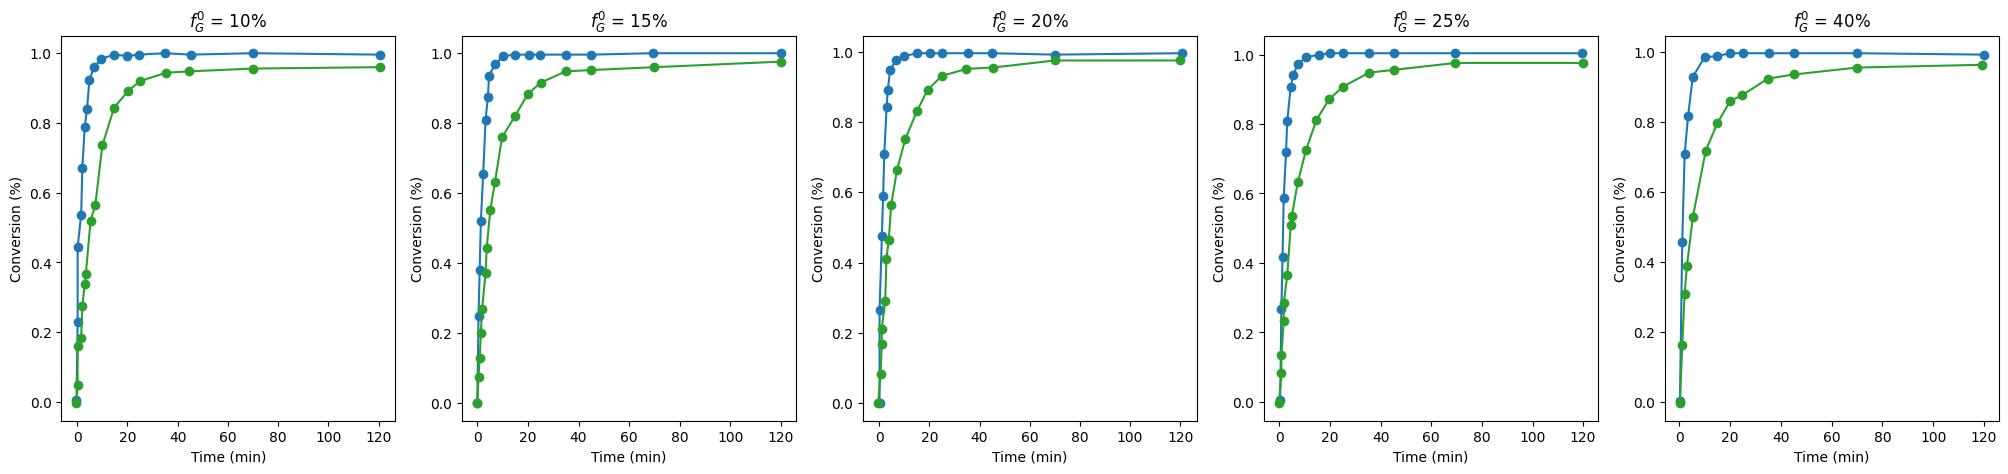

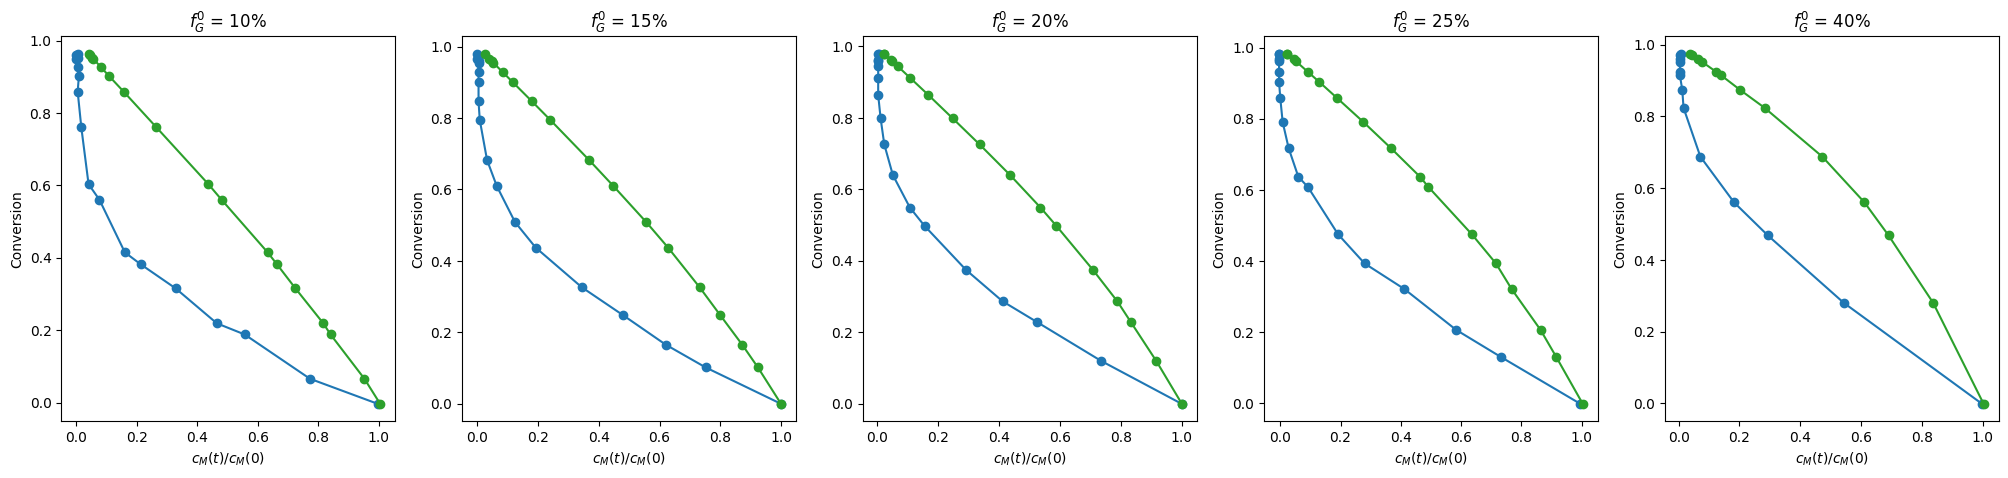

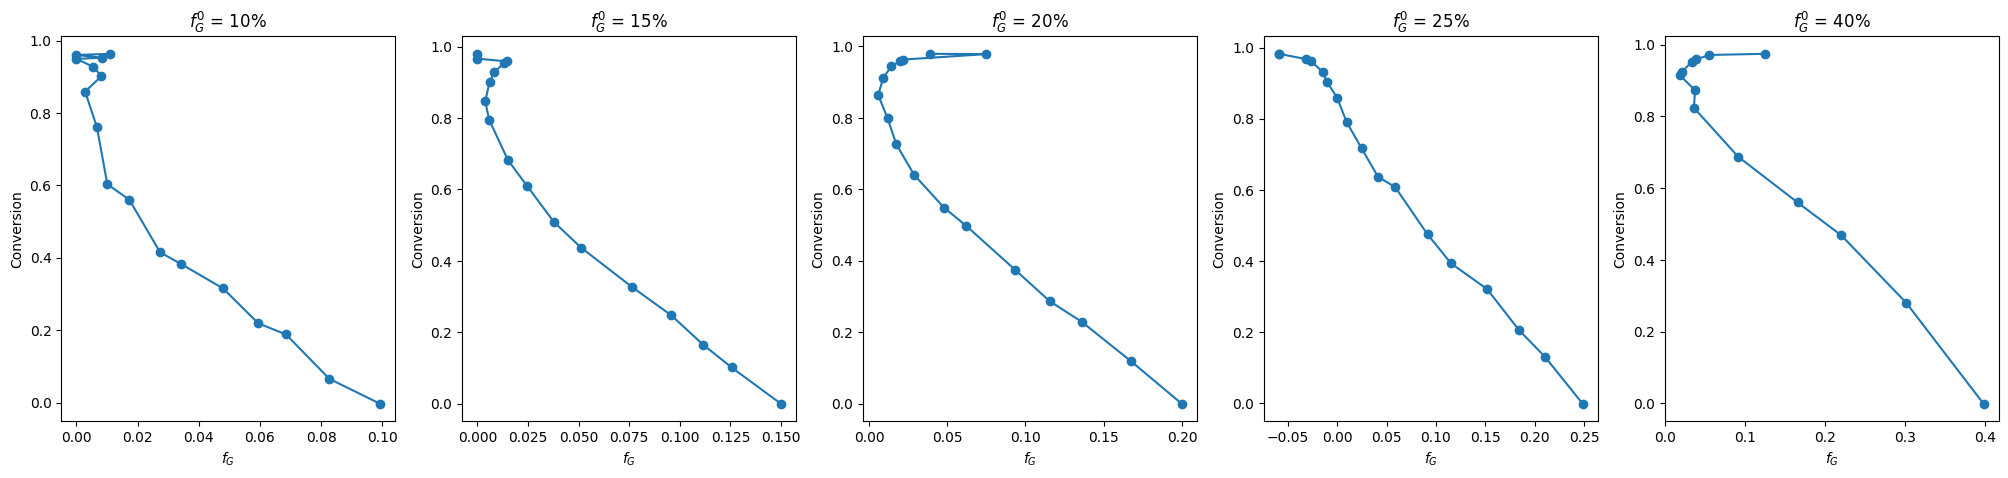

In [38]:
def get_df_key(fG0: int):
    
    if fG0 not in [10, 15, 20, 25, 40]:
        raise ValueError('fG0 must be 10, 15, 20, 25, or 40')
    
    return df[f'T{fG0}G'], df[f'X{fG0}G'], df[f'T{fG0}L'], df[f'X{fG0}L']
    # format 

def plot_conversion_vs_time(ax, fG0_int: int):
    
    TG, XG, TL, XL = get_df_key(fG0_int)
    
    ax.plot(TG, XG, 'o-', color=colorG)
    ax.plot(TL, XL, 'o-', color=colorL)
    
    ax.set_title(f'$f_G^0$ = {fG0_int}%')
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Conversion (%)')
    
def plot_BSL_style(ax, fG0_int: int):
    
    fG0 = fG0_int/100.
    TG, XG, TL, XL = get_df_key(fG0_int)
    X = (fG0)*XG + (1-fG0)*XL
    
    cG = fG0*(1-XG)
    cL = (1-fG0)*(1-XL)
    
    fG = cG/(cG + cL)
    
    ax.plot(1-XG, X, 'o-', color=colorG)
    ax.plot(1-XL, X, 'o-', color=colorL)
    
    ax.set_title(f'$f_G^0$ = {fG0_int}%')
    ax.set_xlabel('$c_M(t)/c_M(0)$')
    ax.set_ylabel('Conversion')

def plot_ML_style(ax, fG0_int: int):
    
    fG0 = fG0_int/100.
    TG, XG, TL, XL = get_df_key(fG0_int)
    X = (fG0)*XG + (1-fG0)*XL
    
    cG = fG0*(1-XG)
    cL = (1-fG0)*(1-XL)
    
    fG = cG/(cG + cL)
    
    ax.plot(fG, X, 'o-', color=colorG)
    
    ax.set_title(f'$f_G^0$ = {fG0_int}%')
    ax.set_xlabel('$f_G$')
    ax.set_ylabel('Conversion')
    
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, fG0 in enumerate([10, 15, 20, 25, 40]):
    plot_conversion_vs_time(axs[i], fG0)
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, fG0 in enumerate([10, 15, 20, 25, 40]):
    plot_BSL_style(axs[i], fG0)
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, fG0 in enumerate([10, 15, 20, 25, 40]):
    plot_ML_style(axs[i], fG0)
plt.show() 


,T10G,X10G,T10L,X10L,T15G,X15G,T15L,X15L,T20G,X20G,T20L,X20L,T25G,X25G,T25L,X25L,T40G,X40G,T40L,X40L
0,-0.31250,0.004,-0.31250,-0.004000,0.000000,0.000,0.000000,0.000,0.15625,0.000,-0.390606,-0.000667,0.307692,0.004,-0.153846,-0.004,0.307692,0.001980,0.307692,-0.003300
1,0.15625,0.228,0.15625,0.048000,0.465116,0.248,0.465116,0.076,0.15625,0.264,0.546894,0.083333,0.769231,0.268,0.769231,0.084,1.230769,0.457426,1.230769,0.163036
2,0.15625,0.444,0.15625,0.160000,0.930233,0.380,0.930233,0.128,1.09375,0.476,1.015644,0.167333,1.230769,0.416,0.769231,0.136,2.153846,0.706931,2.153846,0.309571
3,1.56250,0.536,1.56250,0.184000,1.395349,0.520,1.395349,0.200,1.56250,0.588,1.015644,0.211333,1.692308,0.588,1.692308,0.232,3.538462,0.817822,3.076923,0.388779
4,2.03125,0.672,2.03125,0.276000,2.325581,0.656,1.860465,0.268,2.03125,0.708,2.421894,0.291333,2.615385,0.720,1.692308,0.284,5.384615,0.928713,5.384615,0.527393
5,2.96875,0.788,2.96875,0.337333,3.255814,0.808,3.255814,0.372,2.96875,0.844,2.890644,0.411333,3.076923,0.808,3.076923,0.364,10.000000,0.984158,10.461538,0.717492
6,3.90625,0.840,3.43750,0.368000,4.186047,0.876,3.720930,0.444,3.43750,0.892,3.828144,0.463333,4.461538,0.908,4.461538,0.508,15.076923,0.988119,15.076923,0.796700
7,4.84375,0.924,5.31250,0.520000,4.651163,0.936,5.116279,0.552,4.37500,0.948,4.765644,0.563333,5.384615,0.940,4.923077,0.536,20.153846,0.996040,20.153846,0.860066
8,6.71875,0.960,7.18750,0.564000,6.976744,0.968,6.976744,0.632,6.71875,0.976,7.109394,0.663333,7.230769,0.972,7.230769,0.632,25.230769,0.996040,24.769231,0.875908
9,9.53125,0.984,10.00000,0.736000,10.232558,0.992,9.767442,0.760,10.00000,0.988,10.390644,0.751333,10.461538,0.992,10.461538,0.724,35.384615,0.996040,34.923077,0.923432


In [ ]:
# from PyPESTO.COMP.parse_lynd_data import get_plcl_data, get_plga_data, get_petab_data


data_dir = '/SBML/PyPESTO/COMP/lynd_raw_data/'
plga_df, plga_mdata = get_plga_data(data_dir, indices=[0, 1, 2, 3, 4])
get_petab_data(plga_df, plga_mdata)

/SBML/PyPESTO/COMP/parse_lynd_data.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
/SBML/PyPESTO/COMP/parse_lynd_data.py:297: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


(   observableId simulationConditionId   time  measurement
 0         obs_a                   c_0    0.0     0.737844
 1         obs_a                   c_0    0.5     0.567476
 2         obs_a                   c_0    1.0     0.406847
 3         obs_a                   c_0    1.5     0.342950
 4         obs_a                   c_0    2.0     0.240832
 ..          ...                   ...    ...          ...
 8         obs_b                   c_4   25.0     0.621295
 9         obs_b                   c_4   35.0     0.374911
 10        obs_b                   c_4   45.0     0.308869
 11        obs_b                   c_4   70.0     0.211840
 12        obs_b                   c_4  120.0     0.155451
 
 [162 rows x 4 columns],
   conditionId conditionName         R         A        B
 0         c_0           c_0  0.037929  0.737844  6.64059
 0         c_1           c_1  0.038762  1.131060  6.40937
 0         c_2           c_2  0.039668  1.543350  6.17340
 0         c_3           c_3  0.0